In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("train.csv")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())


Saving train.csv to train.csv
Shape: (3911, 8)

Columns: ['text_id', 'full_text', 'cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

First 5 rows:
         text_id                                          full_text  cohesion  \
0  0016926B079C  I think that students would benefit from learn...       3.5   
1  0022683E9EA5  When a problem is a change you have to let it ...       2.5   
2  00299B378633  Dear, Principal\n\nIf u change the school poli...       3.0   
3  003885A45F42  The best time in life is when you become yours...       4.5   
4  0049B1DF5CCC  Small act of kindness can impact in other peop...       2.5   

   syntax  vocabulary  phraseology  grammar  conventions  
0     3.5         3.0          3.0      4.0          3.0  
1     2.5         3.0          2.0      2.0          2.5  
2     3.5         3.0          3.0      3.0          2.5  
3     4.5         4.5          4.5      4.0          5.0  
4     3.0         3.0          3.0      2.5      

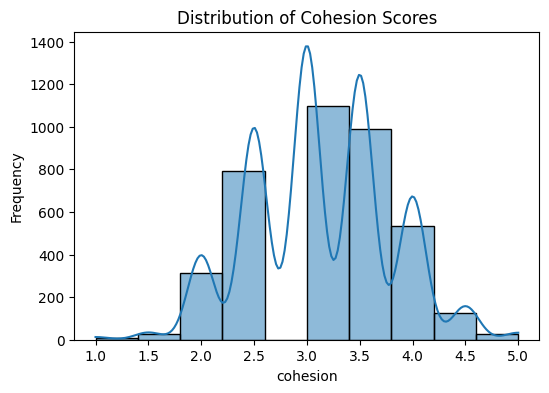

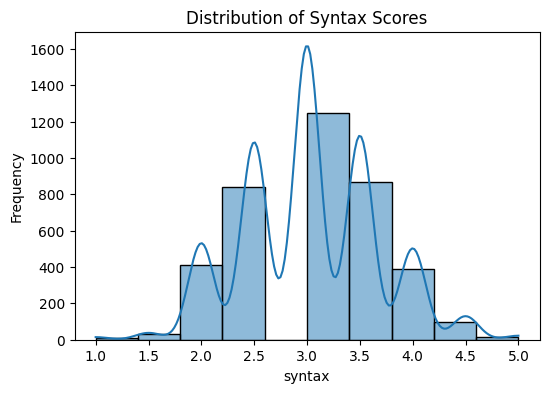

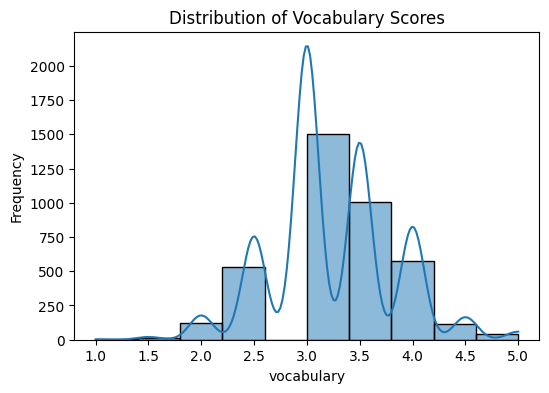

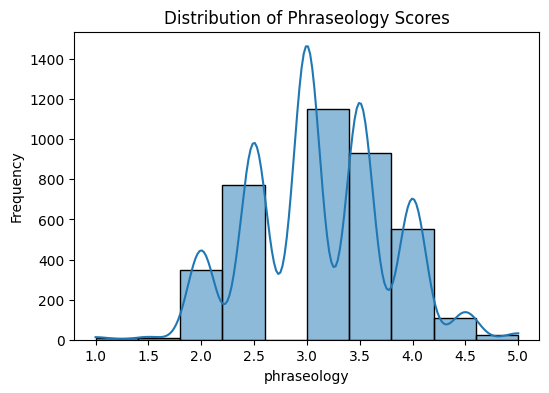

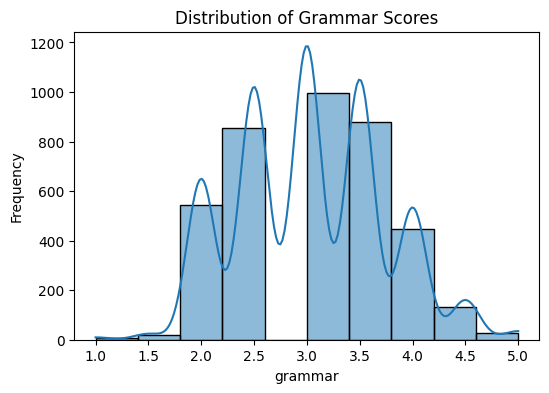

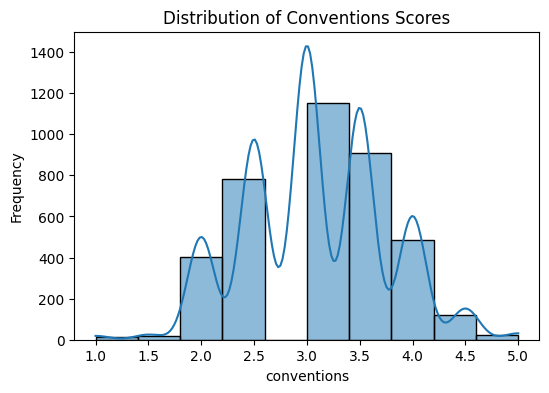

In [3]:
score_columns = ["cohesion", "syntax", "vocabulary", "phraseology", "grammar", "conventions"]
for col in score_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f"Distribution of {col.capitalize()} Scores")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

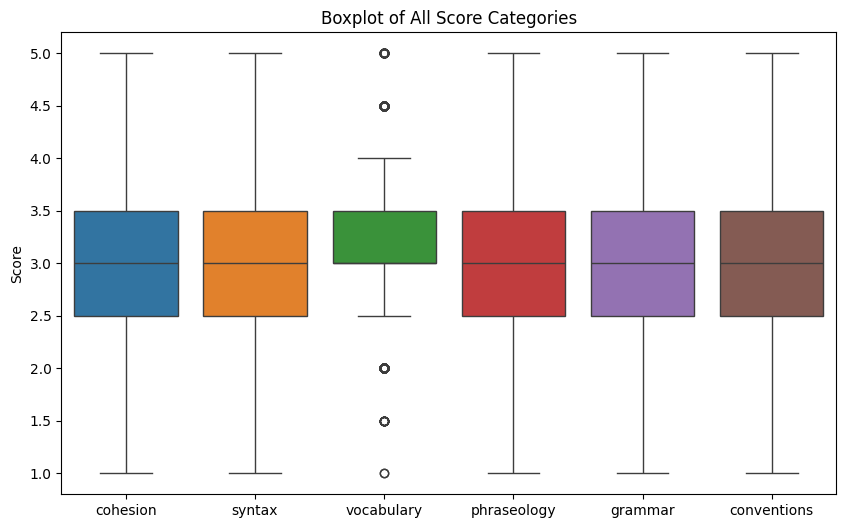

In [4]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[score_columns])
plt.title("Boxplot of All Score Categories")
plt.ylabel("Score")
plt.show()


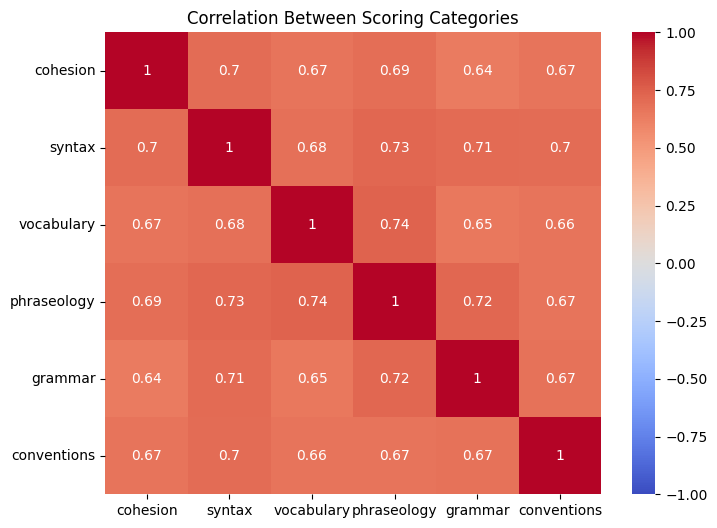

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df[score_columns].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Scoring Categories")
plt.show()


/tmp/ipython-input-1563564222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.index, y=avg_scores.values, palette="viridis")


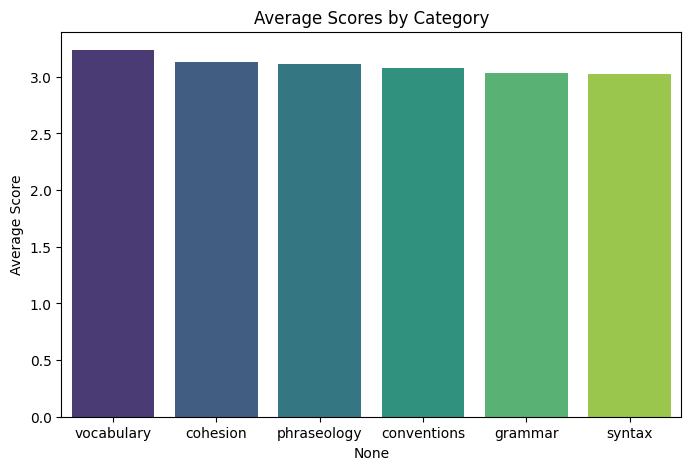

In [6]:
avg_scores = df[score_columns].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=avg_scores.index, y=avg_scores.values, palette="viridis")
plt.title("Average Scores by Category")
plt.ylabel("Average Score")
plt.show()


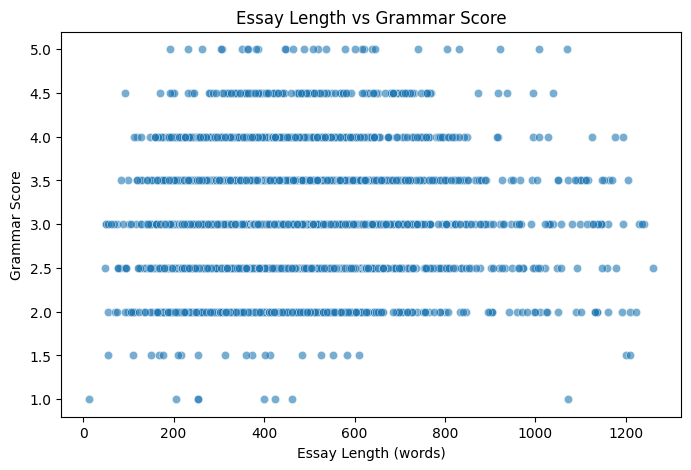

In [7]:
df["essay_length"] = df["full_text"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.scatterplot(x="essay_length", y="grammar", data=df, alpha=0.6)
plt.title("Essay Length vs Grammar Score")
plt.xlabel("Essay Length (words)")
plt.ylabel("Grammar Score")
plt.show()
